# Prepare Chicago Crime Data for a GitHub Repository

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

- 1) Go to the Chicago Data Portal's page for ["Crimes - 2001 to Preset"](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

- 2) Click on the Export button on the top right and select CSV. 
    - Save the file to your Downloads folder instead of your repository. **The file is too big for a repository.**
    
    
    
- 3) Wait for the full file to download. 
    - It is very large (over >1.7GB and may take several minutes to fully download.)
    
    
- 4) Once the download is complete, change `RAW_FILE` variable below to match the filepath to the downloaded file.

## 🚨 Set the correct `RAW_FILE` path

- The cell below will attempt to check your Downloads folder for any file with a name that contains "Crimes_-_2001_to_Present".
    - If you know the file path already, you can skip the next cell and just manually set the RAW_FILE variable in the following code cell.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')


- Your Downloads folder is 'C:\Users\miran\Downloads/'

[i] The following files were found:
	crime_files[0] = 'C:\Users\miran\Downloads\Crimes_-_2001_to_Present (1).csv'
	crime_files[1] = 'C:\Users\miran\Downloads\Crimes_-_2001_to_Present (2).csv'
	crime_files[2] = 'C:\Users\miran\Downloads\Crimes_-_2001_to_Present.csv'

- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.


In [3]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
RAW_FILE = (r"C:/Users/miran/Downloads/Crimes_-_2001_to_Present.csv") #(or slice correct index from the crime_files list)

if RAW_FILE == (r"C:\Users\miran\Downloads\Crimes_-_2001_to_Present.csv"):
	raise Exception("You must update the RAW_FILE variable to match your local filepath.")
	
RAW_FILE

'C:/Users/miran/Downloads/Crimes_-_2001_to_Present.csv'

In [4]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# 🔄 Full Workflow

- Now that your RAW_FILE variable is set either:
    - On the toolbar, click on the Kernel menu > "Restart and Run All".
    - OR click on this cell first, then on the toolbar click on the "Cell" menu > "Run All Below"

In [5]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [6]:
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

C:\Users\miran\AppData\Local\Temp\ipykernel_79224\346346930.py:1: DtypeWarning: Columns (0,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_full = pd.read_csv(RAW_FILE)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631.00,6.00,8.00,44.00,06,NaN,NaN,"2,018.00",04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824.00,8.00,15.00,63.00,11,NaN,NaN,"2,016.00",04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,233.00,2.00,5.00,41.00,18,NaN,NaN,"2,018.00",04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,"2,514.00",25.00,31.00,19.00,14,NaN,NaN,"2,018.00",04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811.00,8.00,23.00,56.00,11,NaN,NaN,"2,015.00",04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813740,2126322,HH361887,05/10/2002 09:45:00 AM,064XX S GREEN ST,0460,BATTERY,SI{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2813741,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2813742,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2813743,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# explicitly setting the format to speed up pd.to_datetime
date_format = "%m/%d/%Y %H:%M:%S %p"


### Demonstrating/testing date_format
example = chicago_full.loc[0,'Date']
display(example)
pd.to_datetime(example,format=date_format)

'09/01/2018 12:01:00 AM'

Timestamp('2018-09-01 12:01:00')

In [8]:
# this cell can take up to 1 min to run
chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full = chicago_full.set_index('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Datetime,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1311049,G000125,01/01/2001 01:00:00 AM,032XX W IRVING PARK RD,1310,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,"1,724.00",17.00,NaN,NaN,14,"1,153,841.00","1,926,448.00","2,001.00",08/17/2015 03:03:40 PM,41.95,-87.71,"(41.954010014, -87.709857541)"
2001-01-01 01:00:00,1315987,G001152,01/01/2001 01:00:00 AM,009XX N HUDSON AV,1310,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,"1,823.00",18.00,NaN,NaN,14,"1,173,036.00","1,906,862.00","2,001.00",08/17/2015 03:03:40 PM,41.90,-87.64,"(41.899860332, -87.63987705)"
2001-01-01 01:00:00,1310288,G000636,01/01/2001 01:00:00 AM,075XX S UNION AV,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621.00,6.00,NaN,NaN,14,"1,172,985.00","1,854,673.00","2,001.00",08/17/2015 03:03:40 PM,41.76,-87.64,"(41.756650158, -87.641607815)"
2001-01-01 01:00:00,1324743,G001083,01/01/2001 01:00:00 PM,005XX E 63 ST,1626,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313.00,3.00,NaN,NaN,19,"1,180,999.00","1,863,398.00","2,001.00",08/17/2015 03:03:40 PM,41.78,-87.61,"(41.780411868, -87.611970027)"
2001-01-01 01:00:00,1315458,G005079,01/01/2001 01:00:00 AM,016XX N HUMBOLDT BL,0820,THEFT,$500 AND UNDER,STREET,False,False,"1,421.00",14.00,NaN,NaN,06,"1,156,090.00","1,910,543.00","2,001.00",08/17/2015 03:03:40 PM,41.91,-87.70,"(41.910320325, -87.702020443)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 12:57:00,13127937,JG326034,07/02/2023 12:57:00 PM,009XX W LAKESIDE PL,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,OTHER (SPECIFY),False,False,"1,914.00",19.00,46.00,3.00,11,"1,169,167.00","1,931,739.00","2,023.00",07/09/2023 04:51:53 PM,41.97,-87.65,"(41.968208915, -87.653363136)"
NaT,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
(chicago_full.isna().sum()/len(chicago_full)).round(2)

ID                     0.00
Case Number            0.00
Date                   0.00
Block                  0.00
IUCR                   0.00
Primary Type           0.00
Description            0.00
Location Description   0.00
Arrest                 0.00
Domestic               0.00
Beat                   0.00
District               0.00
Ward                   0.22
Community Area         0.22
FBI Code               0.00
X Coordinate           0.03
Y Coordinate           0.03
Year                   0.00
Updated On             0.00
Latitude               0.03
Longitude              0.03
Location               0.03
dtype: float64

In [10]:
chicago_full['Year'] = chicago_full.dropna(subset=['Year'], inplace=True)

## Separate the Full Dataset by Years

In [11]:
# save the years for every crime
chicago_full["Year"] = chicago_full.index.year
chicago_full["Year"] = chicago_full["Year"].astype(int)
chicago_full["Year"].value_counts()

2001    483231
2016    269027
2017    268422
2018    268213
2019    260776
2022    237955
2015    218099
2020    211370
2021    207893
2002    170620
2023    124638
2008     12367
2009     11725
2003      9601
2005      9041
2006      7892
2004      7712
2007      6715
2014      6357
2010      5674
2012      5522
2013      5472
2011      5418
Name: Year, dtype: int64

In [12]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [13]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols).sort_index()#.reset_index()
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,"1,724.00",17.00,NaN,2001,41.95,-87.71
2001-01-01 01:00:00,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,"1,823.00",18.00,NaN,2001,41.90,-87.64
2001-01-01 01:00:00,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621.00,6.00,NaN,2001,41.76,-87.64
2001-01-01 01:00:00,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313.00,3.00,NaN,2001,41.78,-87.61
2001-01-01 01:00:00,1315458,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,"1,421.00",14.00,NaN,2001,41.91,-87.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 12:55:00,13126901,07/02/2023 12:55:00 PM,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,True,333.00,3.00,5.00,2023,41.77,-87.58
2023-07-02 12:55:00,13126486,07/02/2023 12:55:00 AM,ASSAULT,AGGRAVATED - OTHER FIREARM,APARTMENT,False,False,731.00,7.00,6.00,2023,41.76,-87.63
2023-07-02 12:56:00,13126922,07/02/2023 12:56:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,924.00,9.00,15.00,2023,41.81,-87.67


In [14]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2813740 entries, 2001-01-01 01:00:00 to 2023-07-02 12:57:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    object 
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                object 
 6   Domestic              object 
 7   Beat                  float64
 8   District              float64
 9   Ward                  float64
 10  Year                  int32  
 11  Latitude              float64
 12  Longitude             float64
dtypes: float64(5), int32(1), object(7)
memory usage: 289.8+ MB


In [15]:
chicago_final.memory_usage(deep=True).astype(float)

Index                   22,509,920.00
ID                     102,090,787.00
Date                   222,285,460.00
Primary Type           189,222,261.00
Description            206,155,410.00
Location Description   192,167,257.00
Arrest                  92,404,604.00
Domestic                91,829,328.00
Beat                    22,509,920.00
District                22,509,920.00
Ward                    22,509,920.00
Year                    11,254,960.00
Latitude                22,509,920.00
Longitude               22,509,920.00
dtype: float64

In [16]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [17]:
FINAL_DROP = ['Datetime','Year','Location Description']

In [18]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.reset_index(drop=False)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [19]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [20]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation

- Follow the example usage above to test if your files were created successfully.

In [21]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,False,False,"1,724.00",17.00,NaN,41.95,-87.71
1,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,False,False,"1,823.00",18.00,NaN,41.90,-87.64
2,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,False,False,621.00,6.00,NaN,41.76,-87.64
3,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,True,False,313.00,3.00,NaN,41.78,-87.61
4,1315458,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,False,False,"1,421.00",14.00,NaN,41.91,-87.70
...,...,...,...,...,...,...,...,...,...,...,...
124633,13126901,07/02/2023 12:55:00 PM,CRIMINAL DAMAGE,TO PROPERTY,False,True,333.00,3.00,5.00,41.77,-87.58
124634,13126486,07/02/2023 12:55:00 AM,ASSAULT,AGGRAVATED - OTHER FIREARM,False,False,731.00,7.00,6.00,41.76,-87.63
124635,13126922,07/02/2023 12:56:00 PM,CRIMINAL DAMAGE,TO VEHICLE,False,False,924.00,9.00,15.00,41.81,-87.67
124636,13127138,07/02/2023 12:56:00 AM,BURGLARY,FORCIBLE ENTRY,False,False,"2,412.00",24.00,50.00,42.00,-87.70


In [22]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    483231
2002    170620
2003      9601
2004      7712
2005      9041
2006      7892
2007      6715
2008     12367
2009     11725
2010      5674
2011      5418
2012      5522
2013      5472
2014      6357
2015    218099
2016    269027
2017    268422
2018    268213
2019    260776
2020    211370
2021    207893
2022    237955
2023    124638
Name: Date, dtype: int64

## Summary

- The chicago crime dataset has now been saved to your repository as csv files. 
- You should save your notebook, commit your work and push to GitHub using GitHub desktop.

In [23]:
import holidays
import datetime as dt
from holidays import country_holidays

# 1) Comparing Police Districts:

### Which district has the most crimes? 
#### As of January 1st, 2001 to July 02, 2023 District 11 has the most crime at 183,222 reports.

### Which has the least?
#### As of January 1st, 2001 to July 02, 2023 District 31 has the least amount of crime at 100 reports.

In [24]:
crime = df.copy()
crime.head()

,ID,Date,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,False,False,"1,724.00",17.00,NaN,41.95,-87.71
1,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,False,False,"1,823.00",18.00,NaN,41.90,-87.64
2,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,False,False,621.00,6.00,NaN,41.76,-87.64
3,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,True,False,313.00,3.00,NaN,41.78,-87.61
4,1315458,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,False,False,"1,421.00",14.00,NaN,41.91,-87.70


In [25]:
most_crime = crime['District'].value_counts()
most_crime

11.00    183222
8.00     177500
6.00     167466
4.00     156053
25.00    151023
7.00     148464
12.00    146119
2.00     143094
18.00    141561
3.00     137422
1.00     131171
19.00    130507
9.00     128233
10.00    125064
5.00     121682
15.00    111476
14.00    105795
16.00     97158
22.00     89801
24.00     86822
17.00     80912
20.00     53094
31.00       100
Name: District, dtype: int64

# 2) Crimes Across the Years:
### Is the total number of crimes increasing or decreasing across the years?
#### There was a fast decline of crime from 2001 and 2003 and slowly increased in 2015.
### Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
#### There are a few types of offenses that have not resin to the hight of others, like Gambling, Kidnapping and Liquor Law Violation, to name a few. There are also some types that have gone up but and gone down by half, like Homicide, Narcotics and Prostitution, with others on the same track.

In [26]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2813740 entries, 0 to 124637
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ID            int64  
 1   Date          object 
 2   Primary Type  object 
 3   Description   object 
 4   Arrest        bool   
 5   Domestic      bool   
 6   Beat          float64
 7   District      float64
 8   Ward          float64
 9   Latitude      float64
 10  Longitude     float64
dtypes: bool(2), float64(5), int64(1), object(3)
memory usage: 220.0+ MB


In [27]:
# CORRECT - properly recognizes dates and does not interpret them as seconds
crime['Date'] = pd.to_datetime(crime['Date'])
crime['Date']

0        2001-01-01 01:00:00
1        2001-01-01 01:00:00
2        2001-01-01 01:00:00
3        2001-01-01 13:00:00
4        2001-01-01 01:00:00
                 ...        
124633   2023-07-02 12:55:00
124634   2023-07-02 00:55:00
124635   2023-07-02 12:56:00
124636   2023-07-02 00:56:00
124637   2023-07-02 12:57:00
Name: Date, Length: 2813740, dtype: datetime64[ns]

In [28]:
## setting and sorting the index = crime.set_index("CrimeDateTime")
crime = crime.set_index("Date")
crime = crime.sort_index()
crime.head(3)

,ID,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,
2001-01-01,1535712,DECEPTIVE PRACTICE,EMBEZZLEMENT,True,False,"1,651.00",16.00,NaN,41.98,-87.91
2001-01-01,9755149,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,False,False,"1,022.00",10.00,24.00,NaN,NaN
2001-01-01,1318802,THEFT,$500 AND UNDER,False,True,532.00,5.00,NaN,41.67,-87.62


In [29]:
## saving just the date (no time) as a column
crime['Date'] = crime.index.date
crime.head(3)

,ID,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date
Date,,,,,,,,,,,
2001-01-01,1535712,DECEPTIVE PRACTICE,EMBEZZLEMENT,True,False,"1,651.00",16.00,NaN,41.98,-87.91,2001-01-01
2001-01-01,9755149,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,False,False,"1,022.00",10.00,24.00,NaN,NaN,2001-01-01
2001-01-01,1318802,THEFT,$500 AND UNDER,False,True,532.00,5.00,NaN,41.67,-87.62,2001-01-01


In [30]:
## Engineering Features using components of the date/time
crime['Year']  = crime.index.year

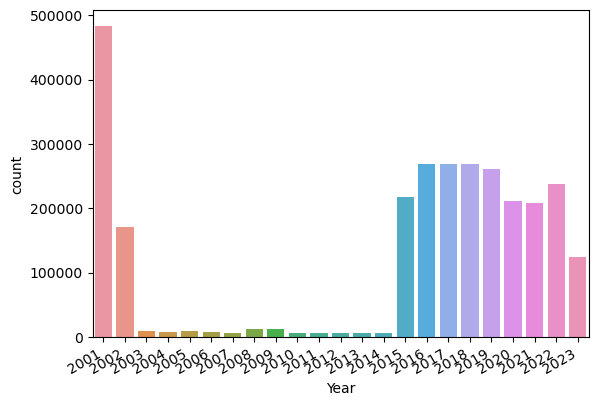

In [31]:
## Visualize years
ax = sns.countplot(data=crime, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

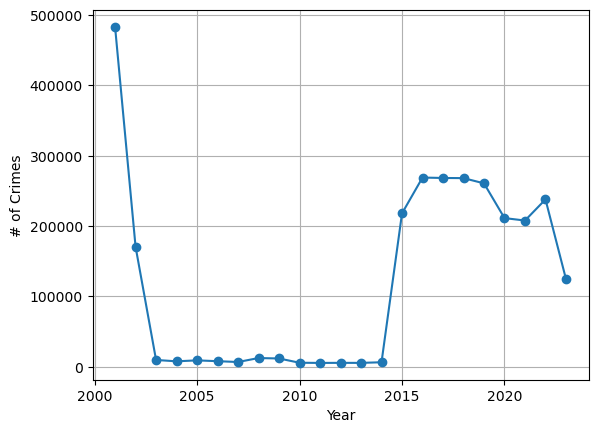

In [32]:
## save year counts
year_counts = crime['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

In [33]:
crime['Year'].value_counts().sort_index(ascending = False).head(15)

2023    124638
2022    237955
2021    207893
2020    211370
2019    260776
2018    268213
2017    268422
2016    269027
2015    218099
2014      6357
2013      5472
2012      5522
2011      5418
2010      5674
2009     11725
Name: Year, dtype: int64

In [34]:
## Get # of crimes by Hour
crimes_by_year = crime.groupby('Primary Type')['Year'].value_counts().sort_index()
crimes_by_year

Primary Type       Year
ARSON              2001    1009
                   2002     427
                   2003      18
                   2004      22
                   2005      13
                           ... 
WEAPONS VIOLATION  2019    6339
                   2020    8432
                   2021    8980
                   2022    8766
                   2023    4373
Name: Year, Length: 679, dtype: int64

In [35]:
## convert to dataframe and reset_index()
plot_df = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,Year,# of Crimes
0,ARSON,2001,1009
1,ARSON,2002,427
2,ARSON,2003,18
3,ARSON,2004,22
4,ARSON,2005,13
...,...,...,...
674,WEAPONS VIOLATION,2019,6339
675,WEAPONS VIOLATION,2020,8432
676,WEAPONS VIOLATION,2021,8980
677,WEAPONS VIOLATION,2022,8766


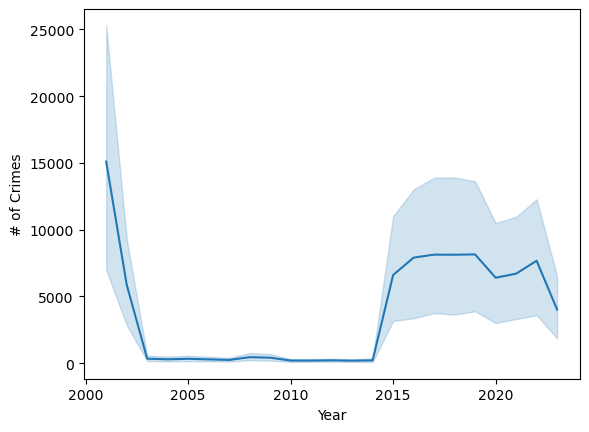

In [36]:
ax = sns.lineplot(data=plot_df, x='Year',y='# of Crimes')

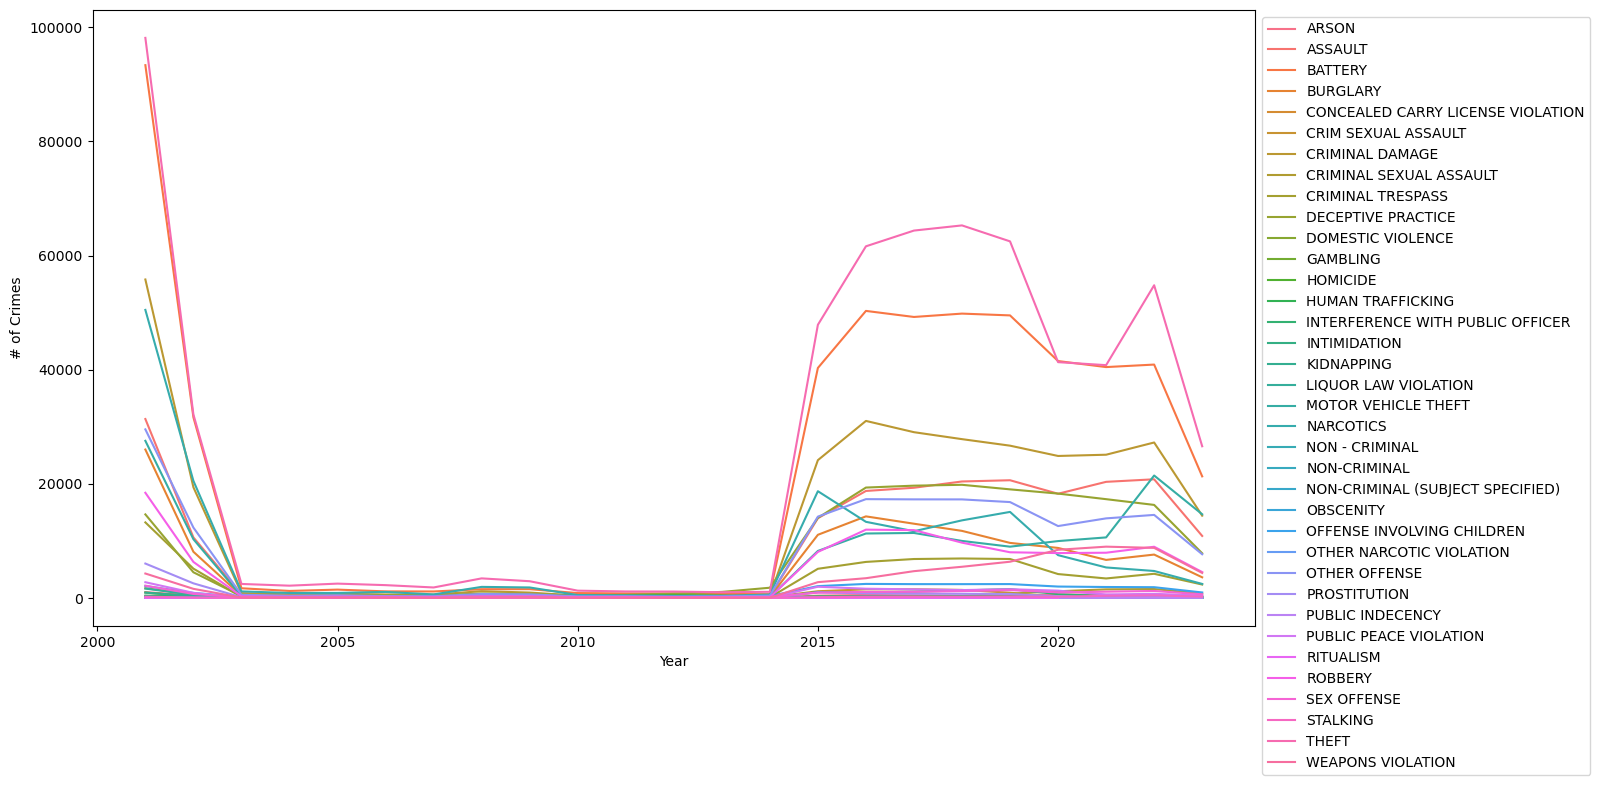

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize= (15, 8))
sns.lineplot(data=plot_df, x='Year',y='# of Crimes',markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);

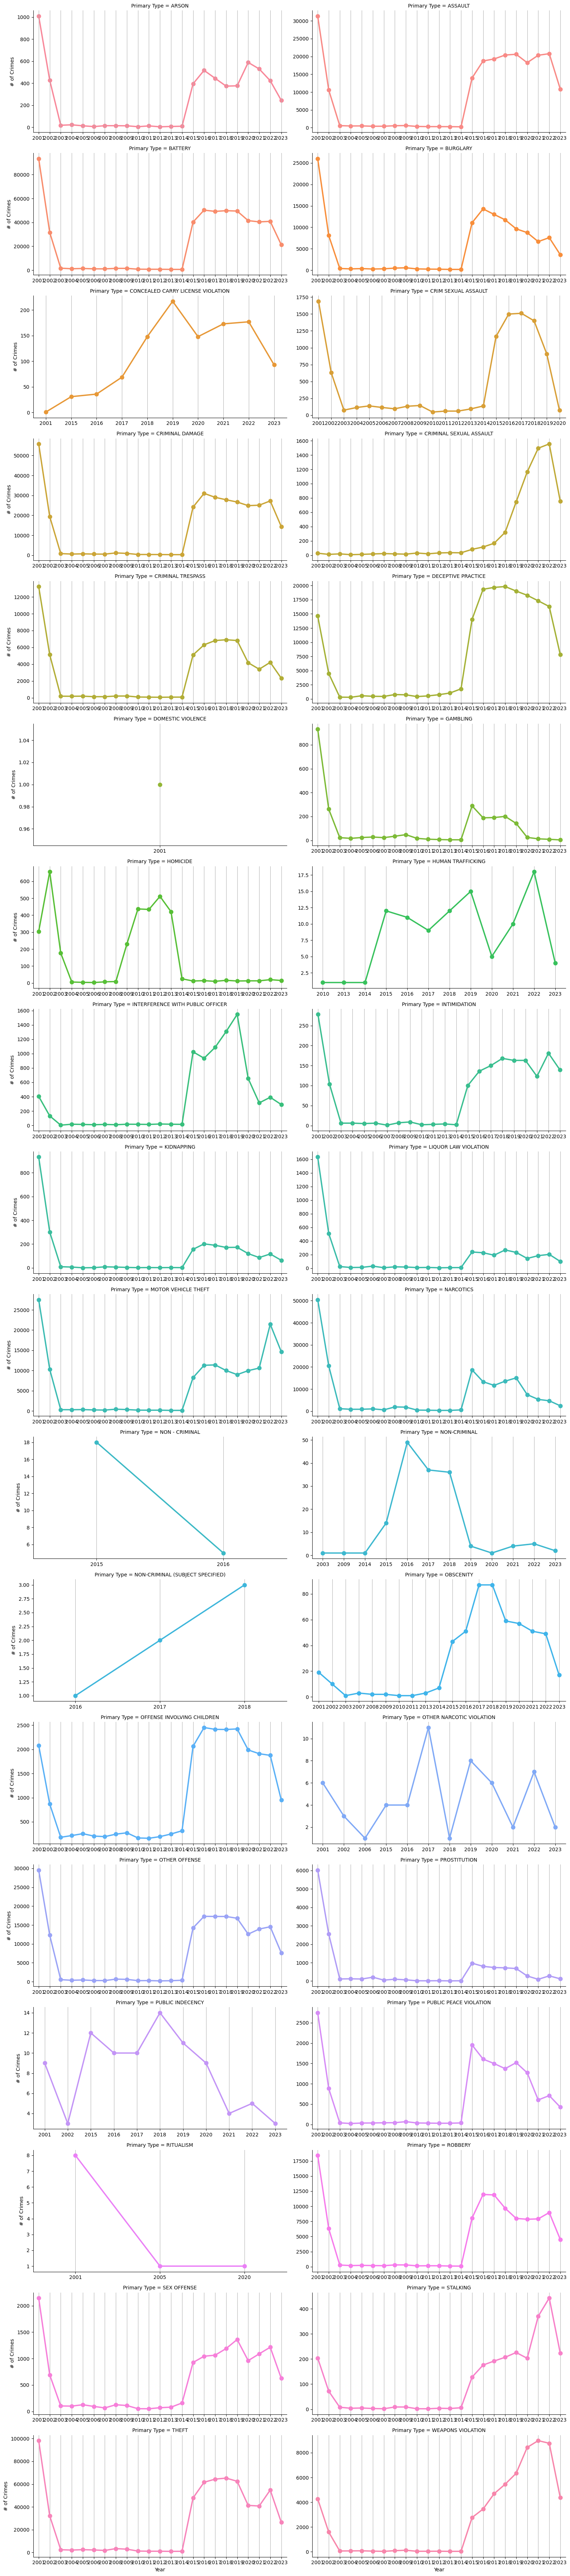

In [38]:
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

# 5) Comparing Holidays:
### Are there any holidays that show an increase in the # of crimes?
#### The US Holiday with the most crime is New Years with Arson being the main crime. 

### Are there any holidays that show a decrease in the # of crimes?
#### You can see that most crimes to happen during time of celebration, when alcohol and reccreational drugs are present. I think covid helped bring down some of the crimes and also the legalization of marijuana. With minor offenses declining I can only assume that law enforcement is looking at bigger issues.

In [39]:
total_incidents= crime['Primary Type'].value_counts()
total_incidents

THEFT                                618486
BATTERY                              521786
CRIMINAL DAMAGE                      312744
ASSAULT                              210373
DECEPTIVE PRACTICE                   178829
OTHER OFFENSE                        178180
NARCOTICS                            173888
MOTOR VEHICLE THEFT                  147247
BURGLARY                             124253
ROBBERY                              105925
CRIMINAL TRESPASS                     66208
WEAPONS VIOLATION                     59749
OFFENSE INVOLVING CHILDREN            24082
PUBLIC PEACE VIOLATION                15042
PROSTITUTION                          14108
SEX OFFENSE                           13465
CRIM SEXUAL ASSAULT                   10090
INTERFERENCE WITH PUBLIC OFFICER       8258
CRIMINAL SEXUAL ASSAULT                6722
ARSON                                  5459
LIQUOR LAW VIOLATION                   4093
HOMICIDE                               3349
KIDNAPPING                      

In [40]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [41]:
## Saving both holiday types as columns
crime["US Holiday"] = [us_holidays.get(day) for day in crime['Date']]
crime.head()

,ID,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date,Year,US Holiday
Date,,,,,,,,,,,,,
2001-01-01,1535712,DECEPTIVE PRACTICE,EMBEZZLEMENT,True,False,"1,651.00",16.00,NaN,41.98,-87.91,2001-01-01,2001,New Year's Day
2001-01-01,9755149,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,False,False,"1,022.00",10.00,24.00,NaN,NaN,2001-01-01,2001,New Year's Day
2001-01-01,1318802,THEFT,$500 AND UNDER,False,True,532.00,5.00,NaN,41.67,-87.62,2001-01-01,2001,New Year's Day
2001-01-01,12784654,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,False,True,"1,133.00",11.00,24.00,NaN,NaN,2001-01-01,2001,New Year's Day
2001-01-01,1692462,OTHER OFFENSE,TELEPHONE THREAT,False,False,813.00,8.00,NaN,41.78,-87.76,2001-01-01,2001,New Year's Day


In [77]:
## Get # of crimes by Hour
holiday_crime = crime.groupby('US Holiday')['Primary Type'].value_counts().sort_index()
holiday_crime

US Holiday             Primary Type                     
Christmas Day          ARSON                                  14
                       ASSAULT                               390
                       BATTERY                              1243
                       BURGLARY                              258
                       CONCEALED CARRY LICENSE VIOLATION       2
                                                            ... 
Washington's Birthday  ROBBERY                               246
                       SEX OFFENSE                            25
                       STALKING                                4
                       THEFT                                1486
                       WEAPONS VIOLATION                     142
Name: Primary Type, Length: 427, dtype: int64

In [68]:
## convert to dataframe and reset_index()
plot_crime = holiday_crimes.to_frame('# of Crimes').reset_index()
plot_crime

,Primary Type,US Holiday,# of Crimes
0,ARSON,Christmas Day,14
1,ARSON,Columbus Day,22
2,ARSON,Independence Day,29
3,ARSON,Independence Day (Observed),4
4,ARSON,Juneteenth National Independence Day,3
...,...,...,...
422,WEAPONS VIOLATION,New Year's Day (Observed),91
423,WEAPONS VIOLATION,Thanksgiving,90
424,WEAPONS VIOLATION,Veterans Day,136
425,WEAPONS VIOLATION,Veterans Day (Observed),45


In [78]:
## checking the values of the index (outer index is level 0)
holiday_crime.index.levels[0]

Index(['Christmas Day', 'Christmas Day (Observed)', 'Columbus Day',
       'Independence Day', 'Independence Day (Observed)',
       'Juneteenth National Independence Day',
       'Juneteenth National Independence Day (Observed)', 'Labor Day',
       'Martin Luther King Jr. Day', 'Memorial Day', 'New Year's Day',
       'New Year's Day (Observed)', 'Thanksgiving', 'Veterans Day',
       'Veterans Day (Observed)', 'Washington's Birthday'],
      dtype='object', name='US Holiday')

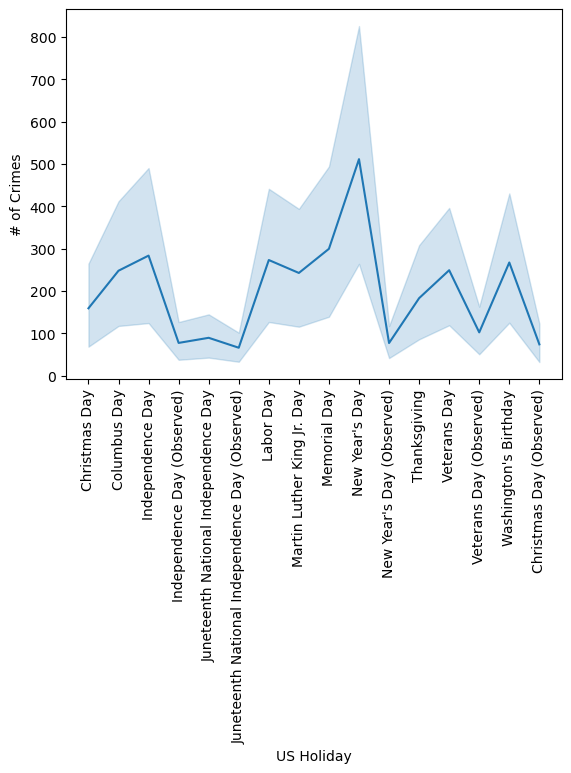

In [86]:
ax = sns.lineplot(data=plot_crime, x='US Holiday',y='# of Crimes')
plt.xticks(rotation=90);

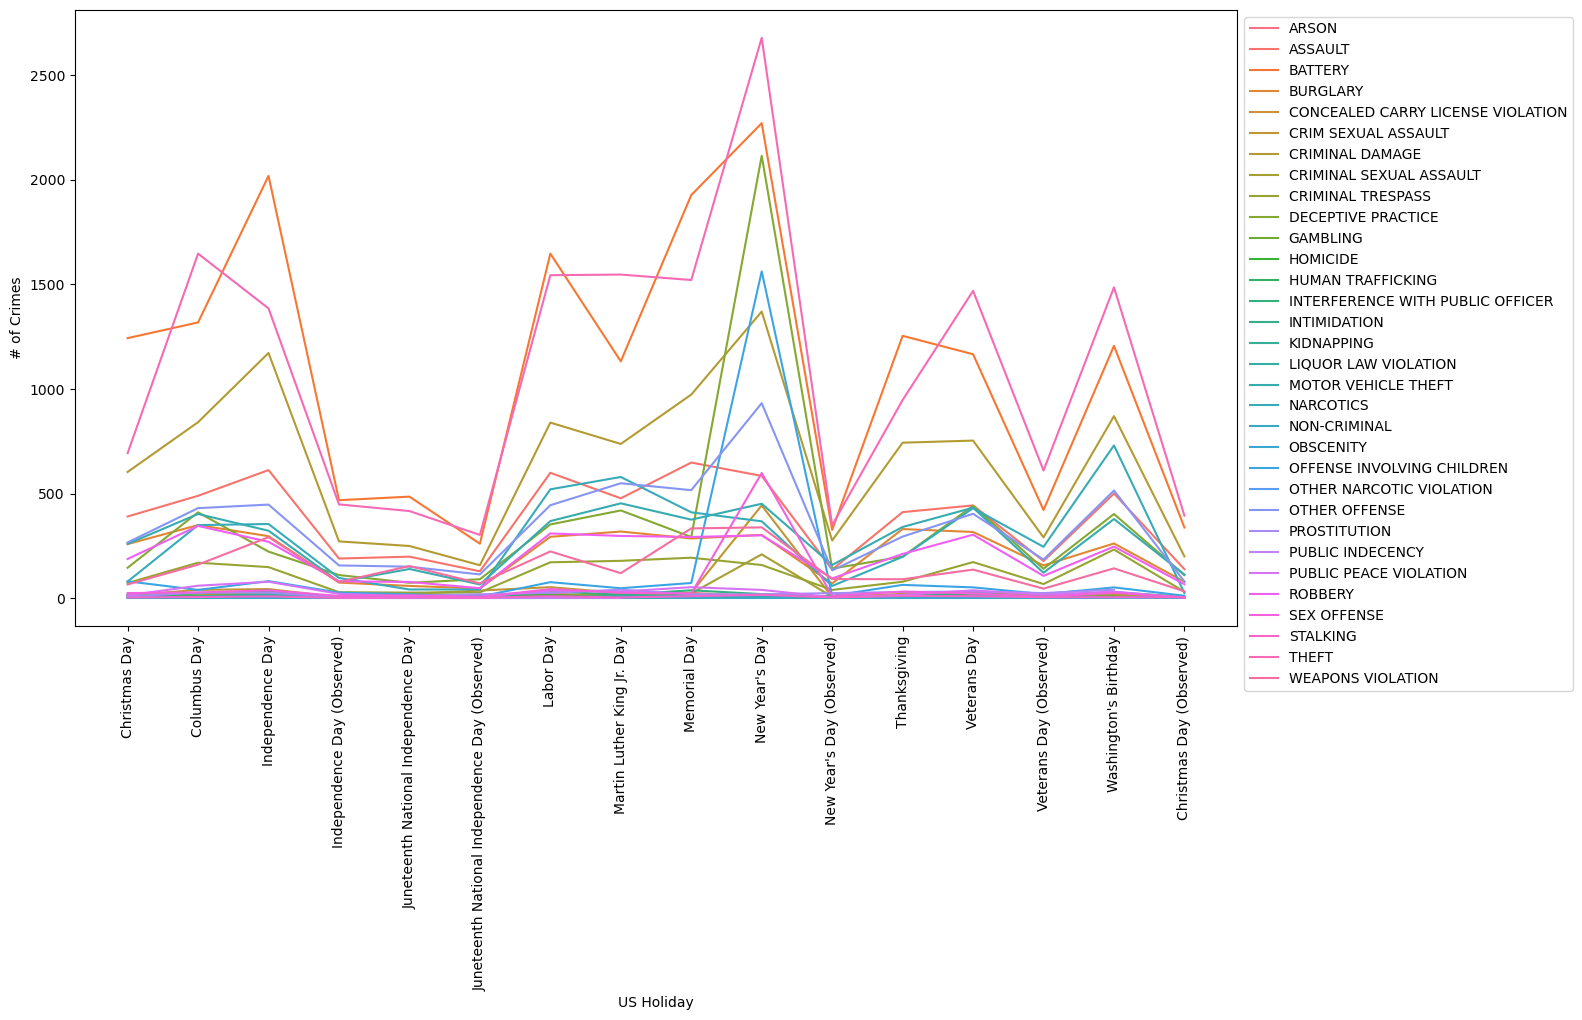

In [85]:
fig, ax = plt.subplots(figsize= (15, 8))
sns.lineplot(data= plot_crime, x='US Holiday',y='# of Crimes',markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);
plt.xticks(rotation=90);

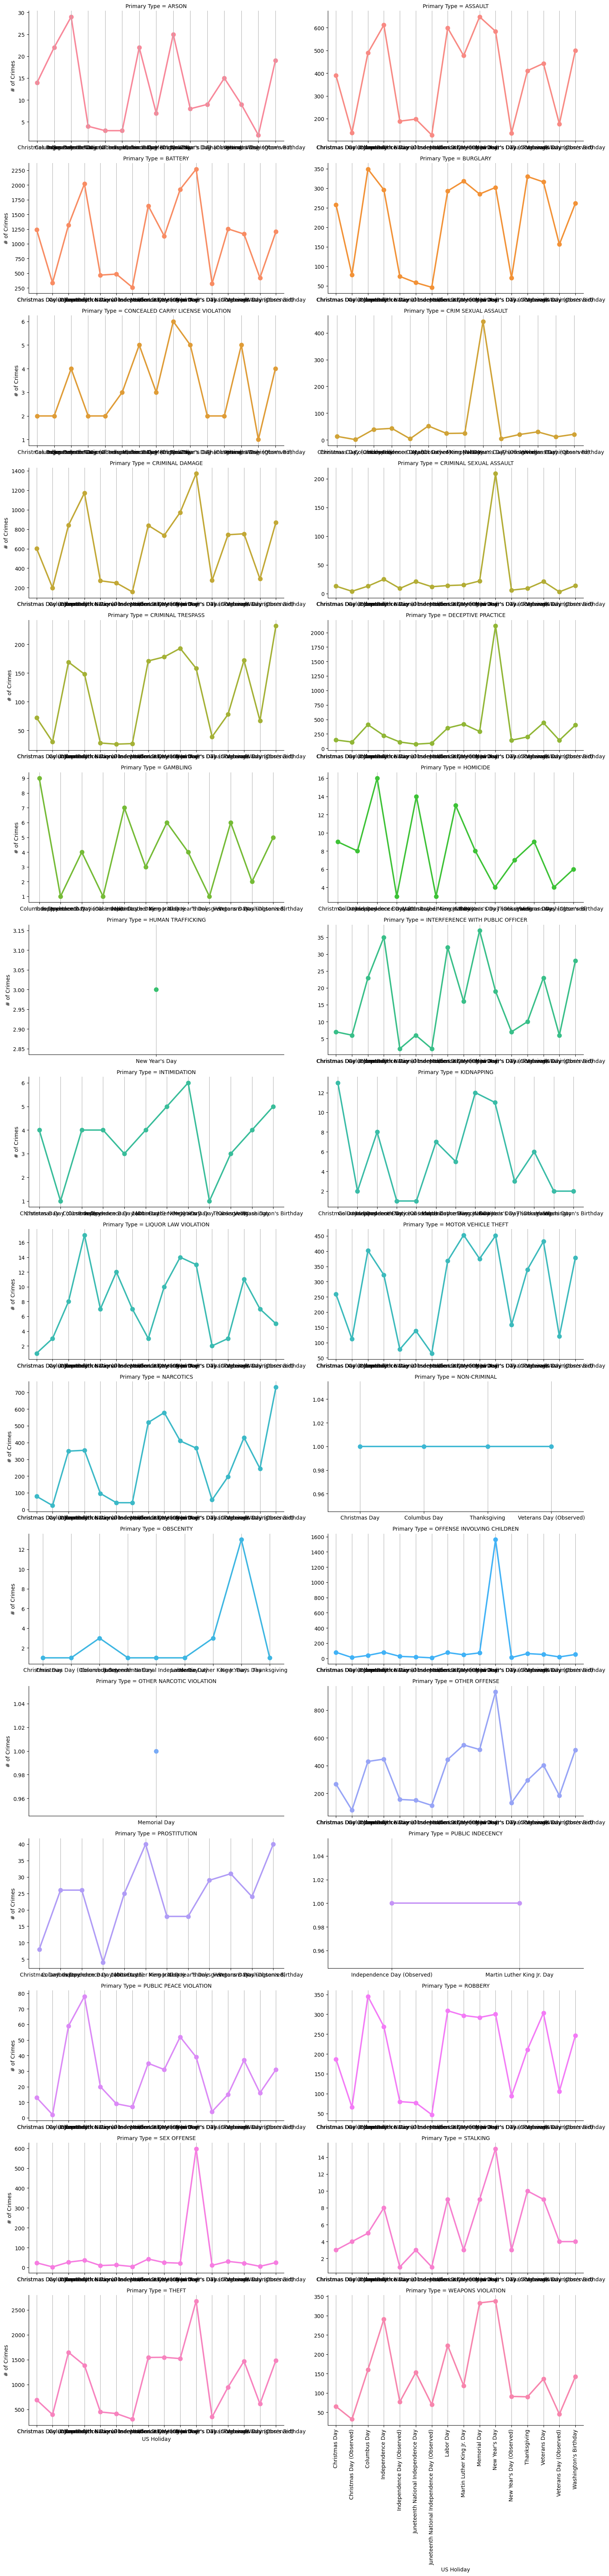

In [58]:
h = sns.catplot(data=plot_crime, x='US Holiday', y='# of Crimes',
                hue='Primary Type', col='Primary Type',col_wrap=2,
                aspect=2, height=4,
                kind='point',sharey=False,sharex=False);

[ax.grid(axis='x') for ax in h.axes]
plt.xticks(rotation=90);

In [80]:
# New Years Day
## Let's filter so we only have crimes committed on New Year's Day:
holiday_crime.loc["New Year's Day"].idxmax

<bound method Series.idxmax of Primary Type
ARSON                                   8
ASSAULT                               584
BATTERY                              2271
BURGLARY                              302
CONCEALED CARRY LICENSE VIOLATION       5
CRIM SEXUAL ASSAULT                   443
CRIMINAL DAMAGE                      1370
CRIMINAL SEXUAL ASSAULT               209
CRIMINAL TRESPASS                     158
DECEPTIVE PRACTICE                   2115
GAMBLING                                4
HOMICIDE                                8
HUMAN TRAFFICKING                       3
INTERFERENCE WITH PUBLIC OFFICER       19
INTIMIDATION                            6
KIDNAPPING                             11
LIQUOR LAW VIOLATION                   13
MOTOR VEHICLE THEFT                   451
NARCOTICS                             367
OBSCENITY                              13
OFFENSE INVOLVING CHILDREN           1562
OTHER OFFENSE                         932
PROSTITUTION                    

In [81]:
# New Years Day
## Let's filter so we only have crimes committed on New Year's Day:
holiday_crime.loc["Christmas Day"].idxmax

<bound method Series.idxmax of Primary Type
ARSON                                  14
ASSAULT                               390
BATTERY                              1243
BURGLARY                              258
CONCEALED CARRY LICENSE VIOLATION       2
CRIM SEXUAL ASSAULT                    13
CRIMINAL DAMAGE                       603
CRIMINAL SEXUAL ASSAULT                13
CRIMINAL TRESPASS                      72
DECEPTIVE PRACTICE                    145
HOMICIDE                                9
INTERFERENCE WITH PUBLIC OFFICER        7
INTIMIDATION                            4
KIDNAPPING                             13
LIQUOR LAW VIOLATION                    1
MOTOR VEHICLE THEFT                   259
NARCOTICS                              79
NON-CRIMINAL                            1
OBSCENITY                               1
OFFENSE INVOLVING CHILDREN             80
OTHER OFFENSE                         266
PROSTITUTION                            8
PUBLIC PEACE VIOLATION          

In [83]:
# New Years Day
## Let's filter so we only have crimes committed on New Year's Day:
holiday_crime.loc["Independence Day"].idxmax

<bound method Series.idxmax of Primary Type
ARSON                                  29
ASSAULT                               612
BATTERY                              2019
BURGLARY                              296
CONCEALED CARRY LICENSE VIOLATION       4
CRIM SEXUAL ASSAULT                    43
CRIMINAL DAMAGE                      1172
CRIMINAL SEXUAL ASSAULT                25
CRIMINAL TRESPASS                     148
DECEPTIVE PRACTICE                    222
GAMBLING                                1
HOMICIDE                               16
INTERFERENCE WITH PUBLIC OFFICER       35
INTIMIDATION                            4
KIDNAPPING                              8
LIQUOR LAW VIOLATION                   17
MOTOR VEHICLE THEFT                   322
NARCOTICS                             354
OBSCENITY                               1
OFFENSE INVOLVING CHILDREN             81
OTHER OFFENSE                         447
PROSTITUTION                           26
PUBLIC PEACE VIOLATION          